## Foundations of Data Science: Prediction and Machine Learning

Mirroring course Jupyter notebook except using standard modules instead of Berkeley data science module.

## Lecture 1: Center and Spread

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10.0, 6.0)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('max_columns', 50)
pd.set_option('max_rows', 9)

### Mean

In [42]:
# Mean
values = np.array([2, 3, 3, 9])
print(values.mean())
print(np.mean(values))

values_table = pd.DataFrame({'values':values})
display(values_table)
values_table.values.mean()

4.25
4.25


,values
0,2
1,3
2,3
3,9


4.25

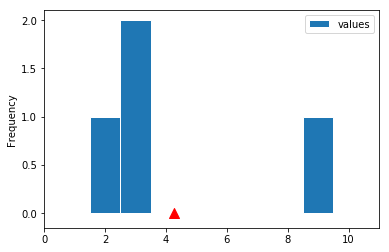

In [44]:
# Histogram
#   mean is center of gravity
values_table.plot.hist(bins=np.arange(0.5, 10.6, 1), ec='w')
plt.scatter(values_table.values.mean(), 0,
            color='red', zorder=2, marker='^', s=100)
plt.show()


In [50]:
# Mean does not depend on length of array
values = np.array([2, 3, 3, 9] * 100)
values.mean()

4.25

### Median

In [72]:
# Median - halfway point of data indicies
values = np.array([1] * 1 + [2] * 2 + [3] * 3 + [4] * 2 + [5] * 1)
print(np.mean(values))
print(np.median(values))
print(np.percentile(values, 50))

3.0
3.0
3.0


In [69]:
# Mean more affected by outliers and skew
values = np.array([1] * 1 + [2] * 2 + [3] * 3 + [4] * 2 + [10] * 1)
print(np.mean(values))
print(np.median(values))

3.5555555555555554
3.0


3.0

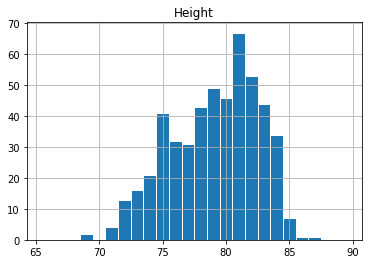

79.06534653465347
80.0


In [81]:
nba = pd.read_csv('data/nba2013.csv')
nba.hist('Height', bins=np.arange(65.5, 90.5), ec='w')
plt.show()

print(nba['Height'].mean())
print(np.median(nba['Height']))

### Standard deviation

In [98]:
print(np.mean(values_table['values']))  # mean
print(np.var(values_table['values']))  # variance
print(np.sqrt(np.var(values_table['values'])))  # standard deviation (sqrt(var))
print(np.std(values_table['values']))  # population standard deviation
print(np.std(values_table['values'], ddof=1))  # Sample standard deviation

4.25
7.6875
2.7726341266023544
2.7726341266023544
3.2015621187164243


### Chebyshev's Bounds

Regardless of the shape of a distribution, the proportion of the data within z standard deviations is at least (1 - (1 / z ^ 2))

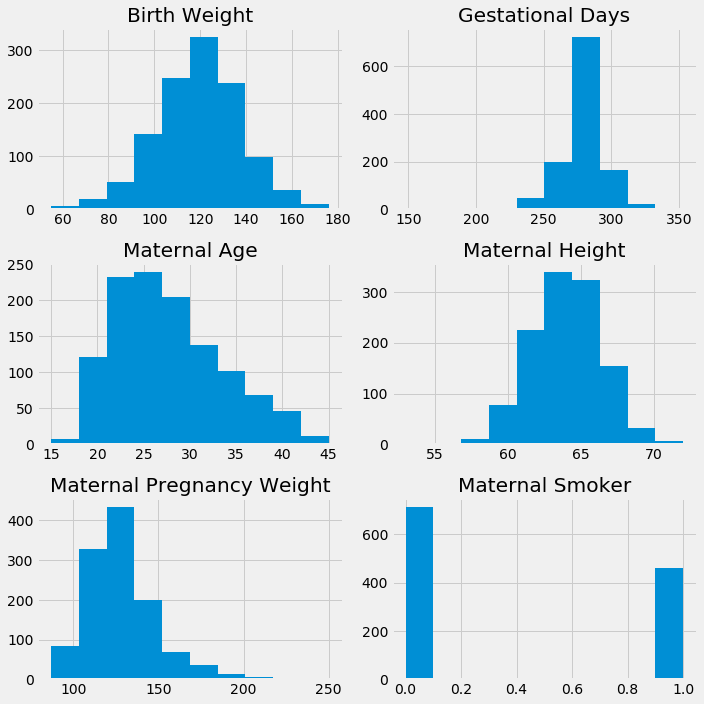

In [120]:
births = pd.read_csv('data/baby.csv')
births.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

In [170]:
n = len(births)
births['Maternal Smoker'] = births['Maternal Smoker'].astype(int)
births_describe = births.describe()
# Alternatively
# births_descrbe = pd.concat([births.mean(), births.std()],
#                            axis=1, keys=['mean', 'std'])

#for column in ['Birth Weight', 'Gestational Days']:   # births.columns:
for column in births.columns:
    print(column)
    for z in [2, 3, 4, 5]:

        mean = births_describe[column]['mean']
        std = births_describe[column]['std']
        lower_bound = mean - z * std
        upper_bound = mean + z * std

        proportion = (len(births[column].loc[(births[column] > lower_bound) &
                                             (births[column] < upper_bound)]) 
                      / n * 100)
        
        print('  Within +/- {0} SDs = {1:6.2f}%'.format(z, proportion))
    print()
        

Birth Weight
  Within +/- 2 SDs =  94.89%
  Within +/- 3 SDs =  99.57%
  Within +/- 4 SDs = 100.00%
  Within +/- 5 SDs = 100.00%

Gestational Days
  Within +/- 2 SDs =  93.78%
  Within +/- 3 SDs =  98.64%
  Within +/- 4 SDs =  99.57%
  Within +/- 5 SDs =  99.83%

Maternal Age
  Within +/- 2 SDs =  94.89%
  Within +/- 3 SDs =  99.91%
  Within +/- 4 SDs = 100.00%
  Within +/- 5 SDs = 100.00%

Maternal Height
  Within +/- 2 SDs =  97.19%
  Within +/- 3 SDs =  99.66%
  Within +/- 4 SDs =  99.91%
  Within +/- 5 SDs = 100.00%

Maternal Pregnancy Weight
  Within +/- 2 SDs =  95.06%
  Within +/- 3 SDs =  98.64%
  Within +/- 4 SDs =  99.49%
  Within +/- 5 SDs =  99.91%

Maternal Smoker
  Within +/- 2 SDs = 100.00%
  Within +/- 3 SDs = 100.00%
  Within +/- 4 SDs = 100.00%
  Within +/- 5 SDs = 100.00%

